In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

### Load Data

In [2]:
train_users = pd.read_csv("encoded_scaled_train.csv")

lab_enc = LabelEncoder()
train_users["label"] = lab_enc.fit_transform(train_users[["country_destination"]])
display(train_users)

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,timestamp_first_active,age,signup_flow,create_year,create_month,create_day,0,1,2,3,...,122,123,124,125,126,127,128,129,country_destination,label
0,-4.380020,-0.030801,-0.427798,-3.222044,-0.006939,1.387946,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NDF,7
1,-4.357961,0.199273,-0.427798,-2.156499,-0.315897,1.044700,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NDF,7
2,-4.348661,2.269939,-0.035009,-3.222044,0.919936,1.387946,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,US,10
3,-4.303076,0.659421,-0.427798,-2.156499,1.846811,-1.243607,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,other,11
4,-4.283949,0.544384,-0.427798,-3.222044,0.919936,-0.213869,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,US,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,1.056855,-0.490950,-0.427798,1.040136,-0.006939,1.616777,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NDF,7
213447,1.056855,-0.030801,-0.427798,1.040136,-0.006939,1.616777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NDF,7
213448,1.056855,-0.490950,-0.427798,1.040136,-0.006939,1.616777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NDF,7
213449,1.056855,-0.030801,2.845444,1.040136,-0.006939,1.616777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NDF,7


### Correlation Heatmap

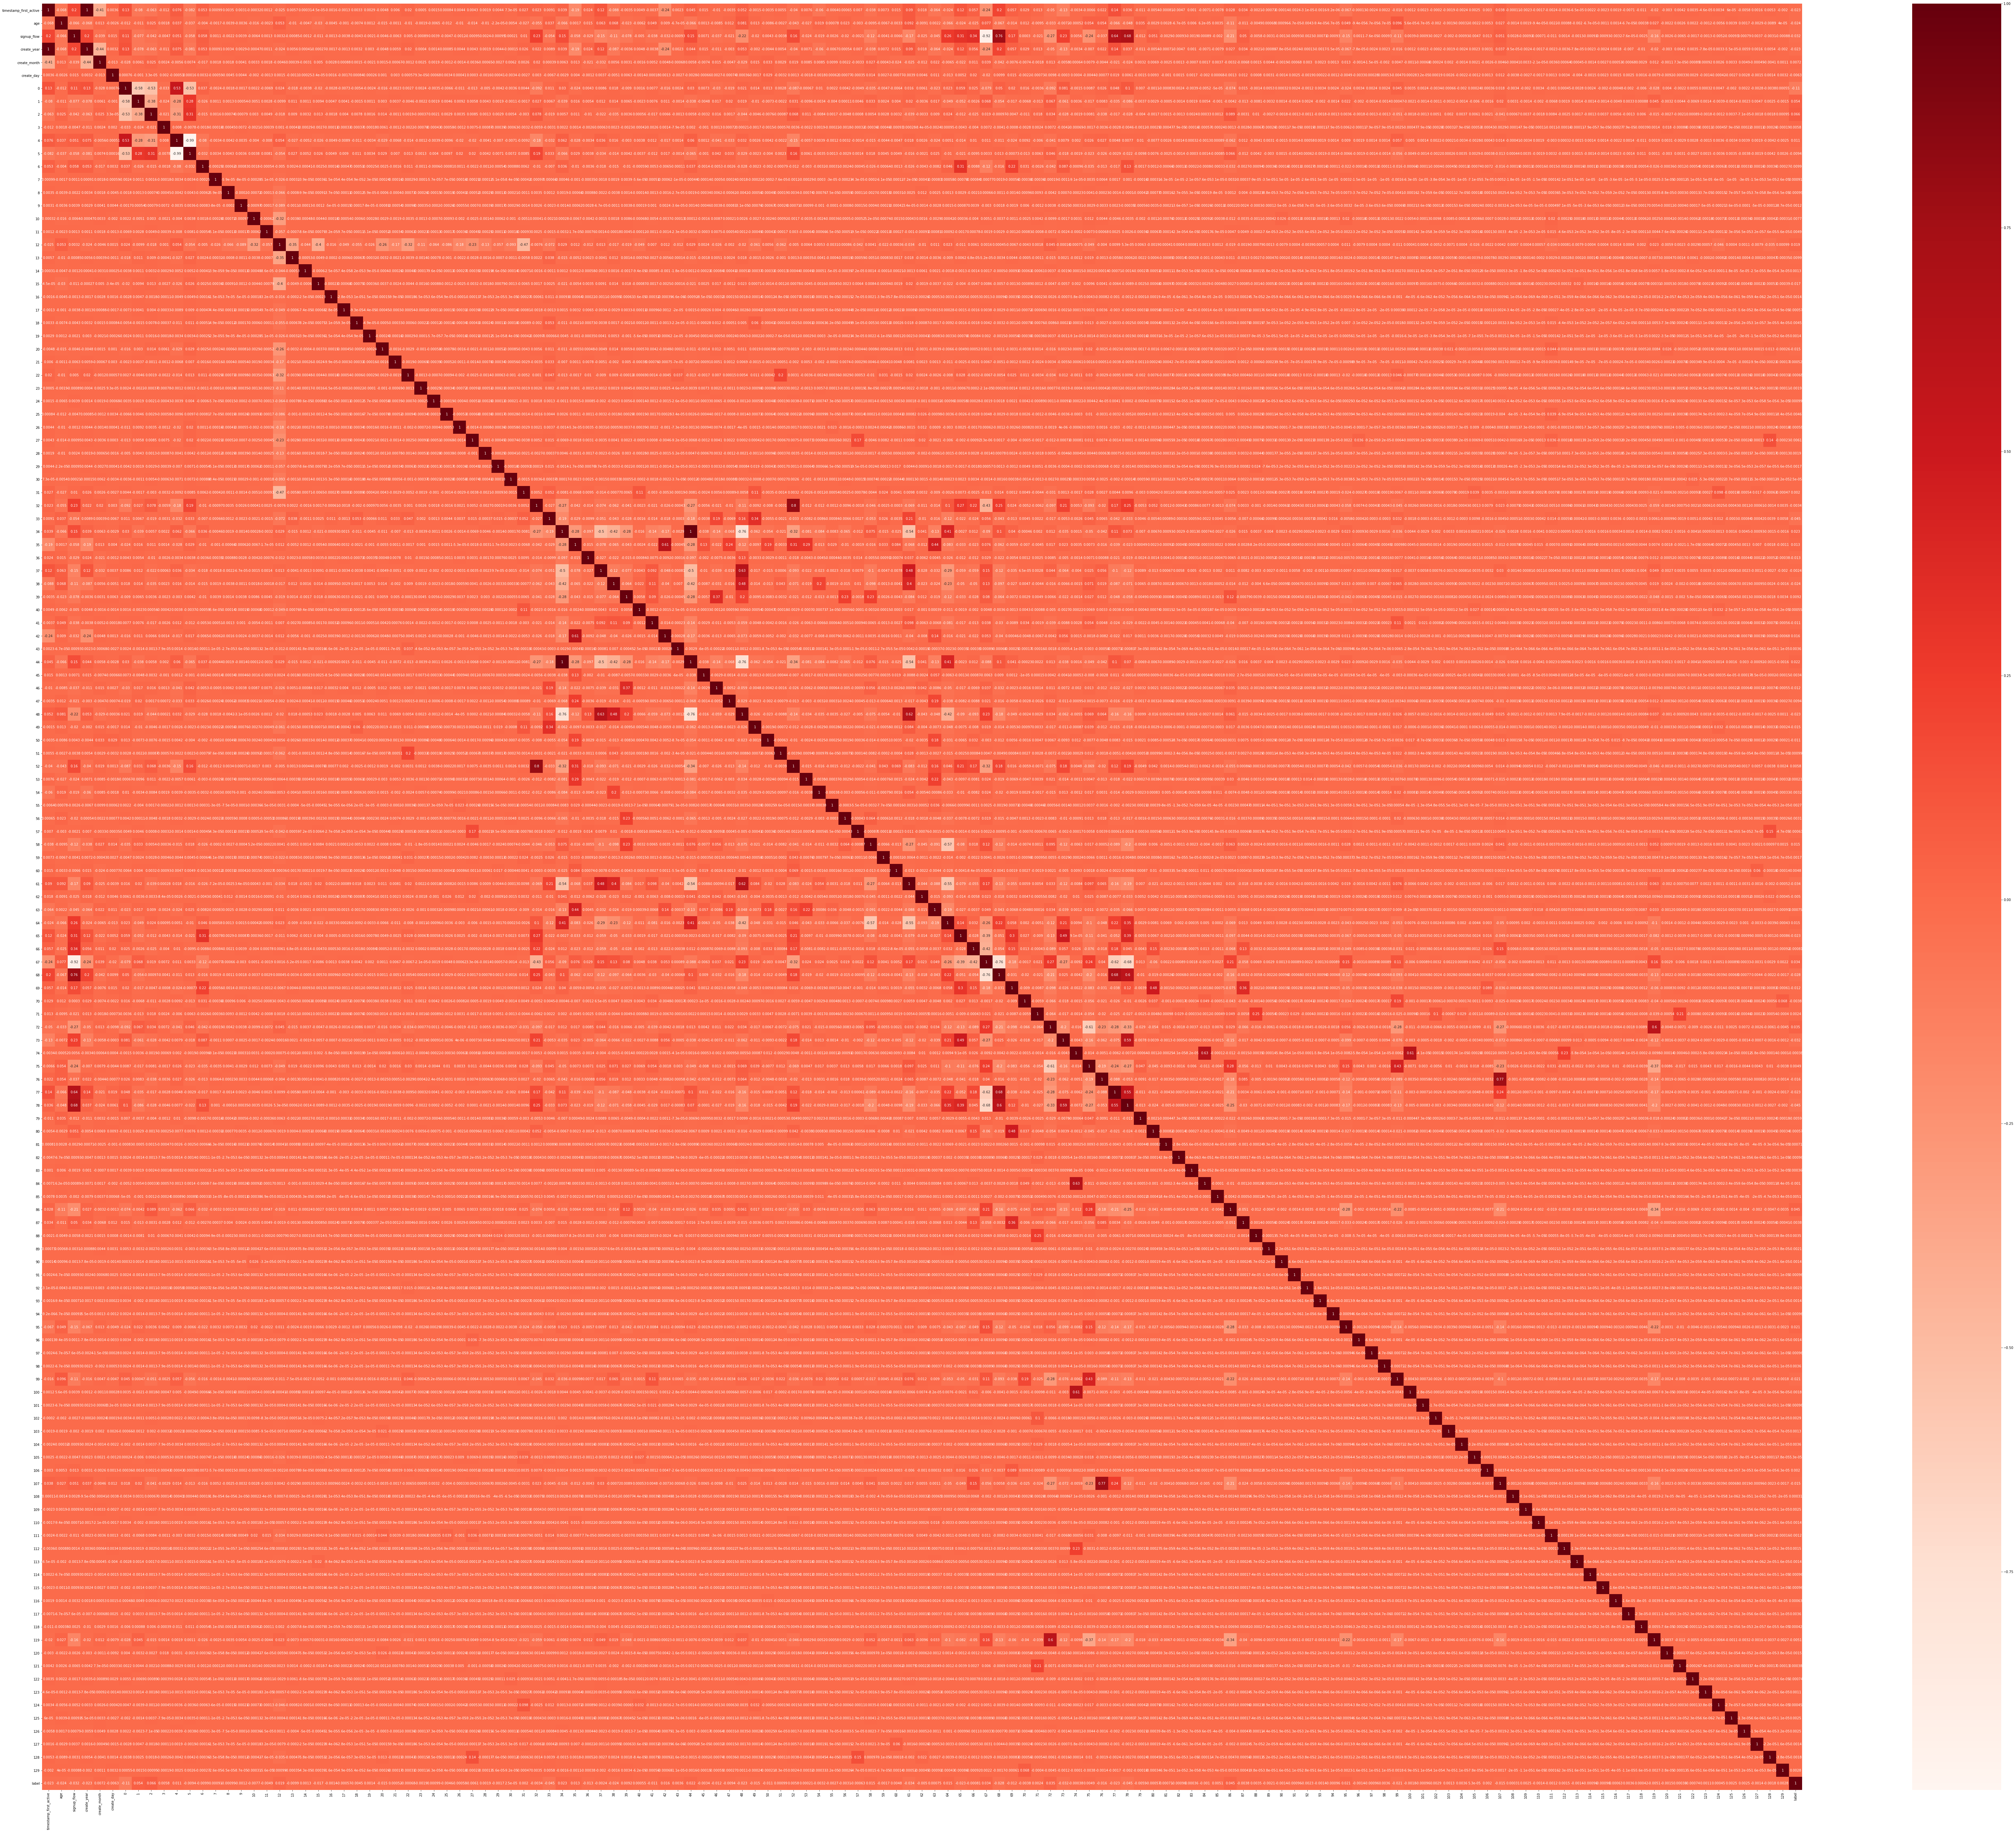

In [3]:
plt.figure(figsize=(120,100))
cor = train_users.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(relevant_features)

0        0.108162
label    1.000000
Name: label, dtype: float64


### Data For Models

In [5]:
y = train_users['country_destination']
display(y)
X = train_users.drop(['country_destination', 'label'], axis = 1)
display(X)

0           NDF
1           NDF
2            US
3         other
4            US
          ...  
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destination, Length: 213451, dtype: object

,timestamp_first_active,age,signup_flow,create_year,create_month,create_day,0,1,2,3,...,120,121,122,123,124,125,126,127,128,129
0,-4.380020,-0.030801,-0.427798,-3.222044,-0.006939,1.387946,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-4.357961,0.199273,-0.427798,-2.156499,-0.315897,1.044700,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.348661,2.269939,-0.035009,-3.222044,0.919936,1.387946,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.303076,0.659421,-0.427798,-2.156499,1.846811,-1.243607,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.283949,0.544384,-0.427798,-3.222044,0.919936,-0.213869,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,1.056855,-0.490950,-0.427798,1.040136,-0.006939,1.616777,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213447,1.056855,-0.030801,-0.427798,1.040136,-0.006939,1.616777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213448,1.056855,-0.490950,-0.427798,1.040136,-0.006939,1.616777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213449,1.056855,-0.030801,2.845444,1.040136,-0.006939,1.616777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CART Classification Feature Importance

In [6]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.37681
Feature: 1, Score: 0.15317
Feature: 2, Score: 0.01018
Feature: 3, Score: 0.00336
Feature: 4, Score: 0.04022
Feature: 5, Score: 0.14456
Feature: 6, Score: 0.01001
Feature: 7, Score: 0.01225
Feature: 8, Score: 0.01312
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00132
Feature: 11, Score: 0.02731
Feature: 12, Score: 0.00005
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00011
Feature: 16, Score: 0.00071
Feature: 17, Score: 0.00004
Feature: 18, Score: 0.00323
Feature: 19, Score: 0.00077
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00108
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00046
Feature: 27, Score: 0.00025
Feature: 28, Score: 0.00081
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.00004
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00021
Feature: 33, Score: 0.00038
Feature: 34, Score: 0.00012
Feature: 35, Score: 0.00004
Fe

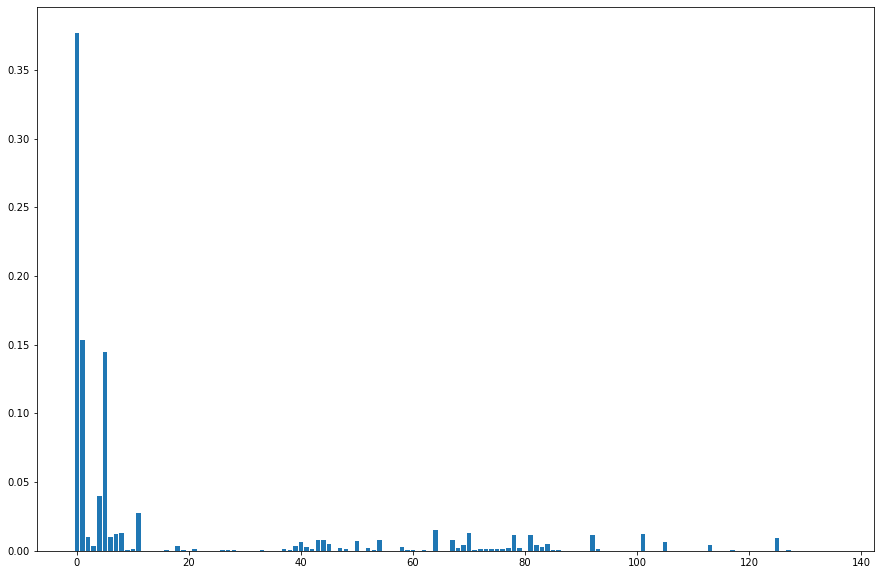

In [7]:
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Random Forest Classification Feature Importance

In [8]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.31193
Feature: 1, Score: 0.17930
Feature: 2, Score: 0.01618
Feature: 3, Score: 0.02316
Feature: 4, Score: 0.09413
Feature: 5, Score: 0.19391
Feature: 6, Score: 0.01549
Feature: 7, Score: 0.00960
Feature: 8, Score: 0.00873
Feature: 9, Score: 0.00054
Feature: 10, Score: 0.00992
Feature: 11, Score: 0.01058
Feature: 12, Score: 0.00009
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00011
Feature: 16, Score: 0.00082
Feature: 17, Score: 0.00004
Feature: 18, Score: 0.00356
Feature: 19, Score: 0.00098
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00117
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00003
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00001
Feature: 26, Score: 0.00056
Feature: 27, Score: 0.00034
Feature: 28, Score: 0.00078
Feature: 29, Score: 0.00019
Feature: 30, Score: 0.00006
Feature: 31, Score: 0.00009
Feature: 32, Score: 0.00029
Feature: 33, Score: 0.00046
Feature: 34, Score: 0.00020
Feature: 35, Score: 0.00003
Fe

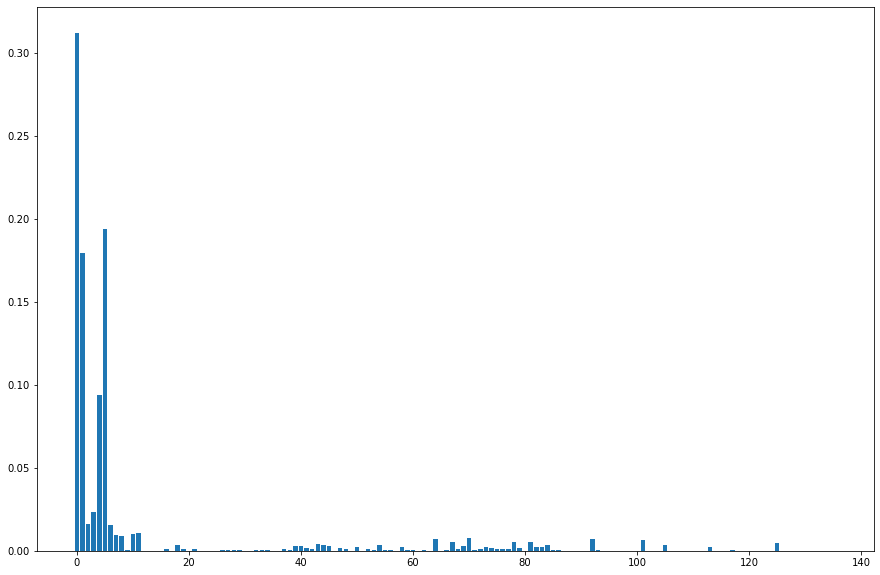

In [9]:
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### XGBoost Classification Feature Importance

In [10]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00655
Feature: 1, Score: 0.02621
Feature: 2, Score: 0.01176
Feature: 3, Score: 0.00560
Feature: 4, Score: 0.00401
Feature: 5, Score: 0.00362
Feature: 6, Score: 0.03976
Feature: 7, Score: 0.00501
Feature: 8, Score: 0.00435
Feature: 9, Score: 0.00316
Feature: 10, Score: 0.01241
Feature: 11, Score: 0.43860
Feature: 12, Score: 0.00132
Feature: 13, Score: 0.00075
Feature: 14, Score: 0.00273
Feature: 15, Score: 0.00272
Feature: 16, Score: 0.00355
Feature: 17, Score: 0.00249
Feature: 18, Score: 0.01007
Feature: 19, Score: 0.00361
Feature: 20, Score: 0.00087
Feature: 21, Score: 0.00513
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00253
Feature: 24, Score: 0.00108
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00573
Feature: 27, Score: 0.00267
Feature: 28, Score: 0.00430
Feature: 29, Score: 0.00197
Feature: 30, Score: 0.00228
Feature: 31, Score: 0.00230
Feature: 32, Score: 0.00186
Feature: 33, Score: 0.00259
Feature: 34, Score: 0.00201
Feature: 35, Score: 0.00149
Fe

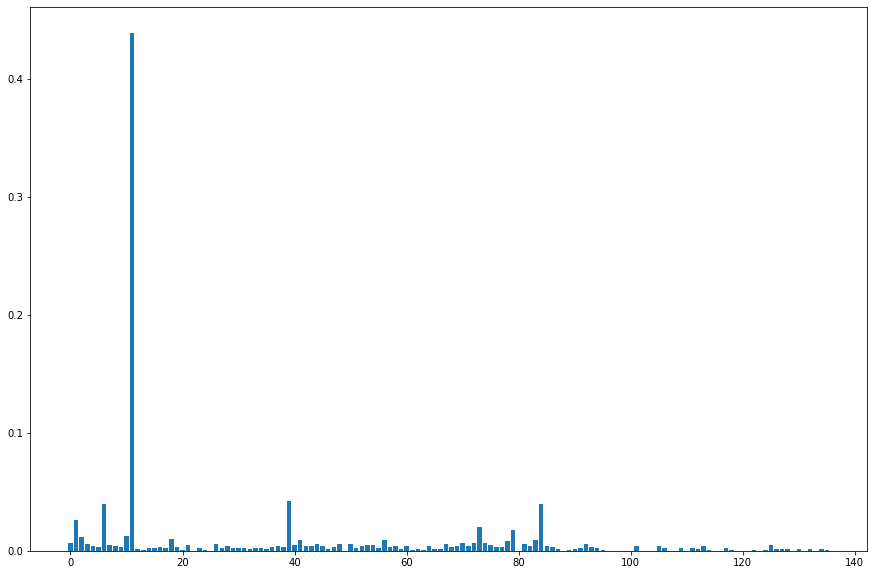

In [11]:
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()